# Assesment Problems

In [12]:
# Import Libraries 
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind 
np.random.seed(50)

## Problem 1: Extending the Lady Tasting Tea

This experiment extends Fisher’s [*Lady Tasting Tea*](https://en.wikipedia.org/wiki/Lady_tasting_tea) design to compare the probability of perfectly identifying all cups in an 8-cup versus a 12-cup setup.
We will use both analytical calculation (`math.comb`) and a Monte Carlo simulation (`numpy`) to estimate these probabilities.

In [13]:
# Define Experiment Parameters.

# Original experiment.
# total cups.
no_cups_orig = 8
# milk-first cups.
no_cups_milk_first_orig = 4  
# tea-first cups.      
no_cups_tea_first_orig = 4           

# Extended experiment.
# total cups (extended).
no_cups_ext = 12
# milk-first cups (extended).                     
no_cups_milk_first_ext = 4  
# tea-first cups (extended).         
no_cups_tea_first_ext = 8           


In [14]:
# Number of ways of selecting 4 milk-first cups from 8 total cups.
ways_orig = math.comb(no_cups_orig, no_cups_milk_first_orig)
# Number of ways of selecting 4 milk-first cups from 12 total cups.
ways_ext = math.comb(no_cups_ext, no_cups_tea_first_ext)

# Show
ways_orig,ways_ext

(70, 495)

- [math.comb – combinations in Python (GeeksforGeeks)](https://www.geeksforgeeks.org/python/python-math-comb-method/) — used to calculate the number of possible cup arrangements.

In [15]:
# Calculate exact probabilities.
prob_orig_exact = 1 / ways_orig
prob_ext_exact  = 1 / ways_ext

print(f"Original experiment exact probability:  {prob_orig_exact}")
print(f"Extended experiment exact probability:  {prob_ext_exact}")

Original experiment exact probability:  0.014285714285714285
Extended experiment exact probability:  0.00202020202020202


In [ ]:
# Monte Carlo simulation of random guesses 

# Seed for reproducibility and consistent results
np.random.seed(50)

# Number of random guesses (10,000 gives stable results with minimal runtime)
# See: Practical Business Python – Monte Carlo Simulation with Python

n_shuffles = 10_000 

# --- Original experiment (8 cups) ---
# Counter to record how many times all cups are guessed correctly
hits_orig = 0

# Repeat the experiment n_shuffles times
for _ in range(n_shuffles):
    # Randomly select 4 cups (from 0–7) to represent the participant's guess
    guess = np.random.choice(no_cups_orig, size=no_cups_milk_first_orig, replace=False)
    
    # Assume the true milk-first cups are {0, 1, 2, 3}.
    # Compare the guessed cups with the true cups as sets.
    if set(guess) == set(range(no_cups_milk_first_orig)):
        # If the guess matches exactly, count it as one.
        hits_orig += 1

# Calculate the simulated probability of a perfect guess
prob_orig_sim = hits_orig / n_shuffles


# --- Extended experiment (12 cups) ---
# Counter to record how many times all cups are guessed correctly
hits_ext = 0

# Repeat the experiment n_shuffles times
for _ in range(n_shuffles):
    # Randomly select 4 cups (from 0–11) to represent the participant's guess
    guess = np.random.choice(no_cups_ext, size=no_cups_milk_first_ext, replace=False)
    
    # Assume the true milk-first cups are {0, 1, 2, 3}.
    # Compare the guessed cups with the true cups as sets.
    if set(guess) == set(range(no_cups_milk_first_ext)):
        # If the guess matches exactly, count it as one.
        hits_ext += 1

# Calculate the simulated probability of a perfect guess
prob_ext_sim = hits_ext / n_shuffles


# --- Display the results ---
print(f"Shuffles: {n_shuffles:,}")
print(f"Original  — exact probability: {prob_orig_exact:.6f}, simulated probability: {prob_orig_sim:.6f}")
print(f"Extended  — exact probability: {prob_ext_exact:.6f}, simulated probability: {prob_ext_sim:.6f}")


Shuffles: 10,000
Original  — exact probability: 0.014286, simulated probability: 0.015100
Extended  — exact probability: 0.002020, simulated probability: 0.002500


- [Monte Carlo Simulation for Sampling in Python (Medium)](https://medium.com/%40kaanalperucan/using-monte-carlo-simulation-for-sampling-in-python-with-examples-7a9600dfb73e) — demonstrates repeating random sampling to estimate probabilities.
- [Monte Carlo Simulation Tutorial (Towards AI)](https://towardsai.net/p/editorial/monte-carlo-simulation-an-in-depth-tutorial-with-python-bcf6eb7856c8) — explains using large numbers of random trials to approximate outcomes.
- [Monte Carlo Simulation with Python (Practical Business Python)](https://pbpython.com/monte-carlo.html) — shows how to run simulation loops similar to the n_shuffles loop.
- [A Guide to Monte Carlo Simulation (Analytics Vidhya)](https://www.analyticsvidhya.com/blog/2021/07/a-guide-to-monte-carlo-simulation/) — outlines using random experiments to estimate probabilities.
- [NumPy random.choice Documentation (DataCamp)](https://www.datacamp.com/doc/numpy/random-choice) — used here to randomly select cups during each simulated shuffle.



### Interpretation
The simulated probabilities closely match the exact analytical results, confirming that the Monte Carlo approach accurately estimates the probability of a perfect guess.  
For the original 8-cup design, the probability of correctly identifying all cups by chance is approximately 0.0143 (1 in 70).  
For the extended 12-cup design, this drops to about 0.0020 (1 in 495), showing that the likelihood of a perfect random guess decreases  as the number of cups increases.  
Because the extended experiment makes a perfect guess so unlikely, one might reasonably consider relaxing the p-value threshold compared to the original setup, as even partial success would already be highly unlikely just by chance. 

- [P-Value Explanation (Statistics How To)](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/p-value/) — clarifies how p-values relate to evidence against the null hypothesis.

---

## Problem 2: Normal distribution

Here we generate many samples from a standard normal distribution, N(0, 1), and compare two ways of calculating the standard deviation for each sample.

Population standard deviation (ddof = 0) divides by n and assumes the data represent the entire population. It is slightly biased when used on a sample because small samples tend to underestimate the true spread.

Sample standard deviation (ddof = 1) divides by n – 1 to correct that bias when estimating from a sample. This version gives a better estimate of the true population spread, especially for small sample sizes.

- [Population vs. Sample Standard Deviation (Statology)](https://www.statology.org/population-vs-sample-standard-deviation/) — explains why ddof=0 underestimates spread and why ddof=1 is the unbiased estimator.

In [17]:
# Number of samples
N = 100000
# Size of each sample
n = 10

# Draw N samples of size n from a standard normal distribution, N(0, 1)
# Result is a 2D array with N rows and n columns
samples = np.random.normal(0, 1, (N, n))

# Calculate the standard deviation of each sample
# Population SD
sd_pop = np.std(samples, axis=1, ddof=0)
# Sample SD
sd_smp = np.std(samples, axis=1, ddof=1) 

- [numpy.random.normal (NumPy)](https://numpy.org/doc/2.1/reference/random/generated/numpy.random.normal.html) — used to generate N samples from a standard normal distribution.  
- [Normal Distribution in NumPy (GeeksforGeeks)](https://www.geeksforgeeks.org/numpy/normal-distribution-in-numpy/) — explains how NumPy generates normal-distributed random numbers.  
- [numpy.std (NumPy)](https://numpy.org/doc/2.1/reference/generated/numpy.std.html) — documentation for computing standard deviation including ddof options.  
- [numpy.std() in Python (GeeksforGeeks)](https://www.geeksforgeeks.org/python/numpy-std-in-python/) — overview of using `np.std` and its parameters.  
- [How to Compute Standard Deviation in NumPy (Spark By Examples)](https://sparkbyexamples.com/python/python-numpy-standard-deviation-function/) — additional explanation of population vs. sample standard deviation in NumPy.


In [18]:
# Compare the average population and sample standard deviations across all samples
np.mean(sd_pop), np.mean(sd_smp)

(0.9233056431863863, 0.9732496029852354)

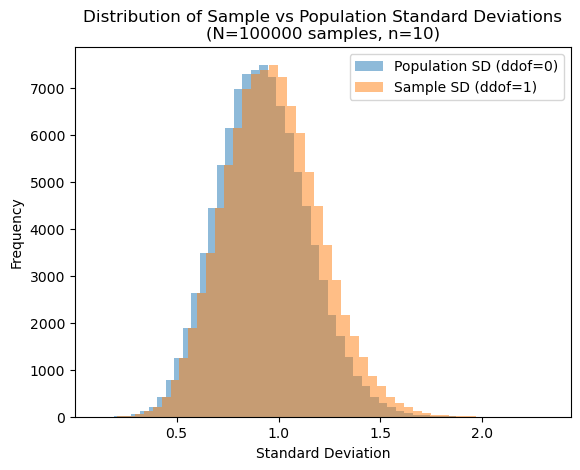

In [19]:
# Plot overlapping histograms to compare population and sample standard deviation distributions
plt.hist(sd_pop, bins=50, alpha=0.5, label='Population SD (ddof=0)')
plt.hist(sd_smp, bins=50, alpha=0.5, label='Sample SD (ddof=1)')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.title('Distribution of Sample vs Population Standard Deviations\n(N=100000 samples, n=10)')
plt.legend()
plt.show()

### Interpretation
The histogram shows that the sample standard deviations (ddof = 1) are a bit higher on average than the population standard deviations (ddof = 0).
This is because dividing by n – 1 corrects the slight underestimation that occurs when dividing by n in small samples.
Both distributions have a similar shape and overlap a lot, but the sample SD curve is shifted a little to the right.
As the sample size increases, this difference becomes smaller, and both values move closer to 1 — the true standard deviation of N(0, 1).

- [Population vs. Sample Standard Deviations (ThoughtCo)](https://www.thoughtco.com/population-vs-sample-standard-deviations-3126372) — explains the distinction between the two measures.  
- [Bessel’s Correction (Wikipedia)](https://www.wikipedia.org/wiki/Bessel%27s_correction) — describes why dividing by n–1 removes bias.  
- [Population vs. Sample Standard Deviation Review (Khan Academy)](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review) — helpful refresher on both formulas.  
- [Population vs. Sample Standard Deviation (Statology)](https://www.statology.org/population-vs-sample-standard-deviation/) — clear explanation of why ddof=1 is used for samples.


In [20]:
# Compare mean standard deviations for different sample sizes
for n in [3,5, 10, 15, 30, 50, 100]:
    samples = np.random.normal(0, 1, (N, n))  # Generate N samples of size n
    mean_pop = np.mean(np.std(samples, axis=1, ddof=0))  # Mean population SD
    mean_smp = np.mean(np.std(samples, axis=1, ddof=1))  # Mean sample SD
    print(f"n={n:<3} | mean(pop SD)={mean_pop:.4f} | mean(sample SD)={mean_smp:.4f}")

n=3   | mean(pop SD)=0.7220 | mean(sample SD)=0.8843
n=5   | mean(pop SD)=0.8421 | mean(sample SD)=0.9415
n=10  | mean(pop SD)=0.9241 | mean(sample SD)=0.9741
n=15  | mean(pop SD)=0.9491 | mean(sample SD)=0.9824
n=30  | mean(pop SD)=0.9753 | mean(sample SD)=0.9919
n=50  | mean(pop SD)=0.9851 | mean(sample SD)=0.9951
n=100 | mean(pop SD)=0.9923 | mean(sample SD)=0.9973


- [numpy.random.normal (NumPy)](https://numpy.org/doc/2.1/reference/random/generated/numpy.random.normal.html) — used to generate N samples from a standard normal distribution for each sample size n.  
- [numpy.std (NumPy)](https://numpy.org/doc/2.1/reference/generated/numpy.std.html) — documentation for computing standard deviation, including ddof=0 and ddof=1.

### Conclusion 
As seen above, the population SD underestimates variability for small samples, but this bias fades as sample size increases. Both SD estimates converge toward 1, the true standard deviation of the standard normal distribution.

---

## Problem 3: t-Tests

In this problem, we use simulation to look at **type II errors**.
A **type II error** is when there really is a difference between groups, but our test fails to detect it.
We will:
Simulate two groups of data:
- Group 1 always has mean 0, SD 1.
- Group 2 has mean d, SD 1, where d goes from 0 to 1 in steps of 0.1.
For each value of d:
  1. Take two samples of size 100.
  2. Run an independent t-test.
  3. Check whether the test fails to reject the null hypothesis.

We repeat this 1,000 times for each d and plot the proportion of times the test fails to detect a difference.  
This shows how the type II error rate changes as the true difference between the two groups gets bigger.

- [Type II Error Calculator (Statology)](https://www.statology.org/type-ii-error-calculator/) — explains what a type II error is and how it is calculated.

In [21]:
# Sample size for each group
n = 100

# Number of simulations per mean difference
n_sims = 1000

# Significance level
alpha = 0.05

# Values of d (true difference in means)
d_values = np.arange(0, 1.1, 0.1)

d_values

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

- [scipy.stats.ttest_ind (SciPy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) — used later to run the independent two-sample t-tests.  
- [numpy.arange (NumPy)](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) — used to generate the sequence of d values.


In [22]:
# Run the simulations to estimate type II error rates

type2_errors = []  # store results for each value of d

for d in d_values:
    errors = 0
    
    for _ in range(n_sims):
        # Generate samples
        group1 = np.random.normal(0, 1, n)
        group2 = np.random.normal(d, 1, n)
        
        # Run independent t-test
        t_stat, p_value = ttest_ind(group1, group2)
        
        # Count type II error (fail to reject when p > alpha)
        if p_value > alpha:
            errors += 1
    
    # Proportion of type II errors
    type2_errors.append(errors / n_sims)

type2_errors


[0.96, 0.895, 0.718, 0.467, 0.187, 0.062, 0.006, 0.002, 0.0, 0.0, 0.0]

- [How to Code the Student’s t-Test in Python (Machine Learning Mastery)](https://www.machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/) — explains how the t-test works and how to implement it programmatically.  
- [Hypothesis Testing and the T-Test: A Python Example (Medium)](https://medium.com/%40wilbossoftwarejourney/unlocking-the-power-of-hypothesis-testing-how-the-t-test-can-help-you-make-informed-decisions-b3eed0488a42) — demonstrates running t-tests on generated data in Python.  
- [Introduction to Power Analysis in Python (GeeksforGeeks)](https://www.geeksforgeeks.org/python/introduction-to-power-analysis-in-python/) — explains type II errors and how repeated simulations relate to statistical power.  
- [How to Perform Hypothesis Testing with SciPy (Statology)](https://www.statology.org/how-perform-hypothesis-testing-scipy/) — overview of using SciPy’s hypothesis testing functions.  
- [A Guide to Monte Carlo Simulation in Python (Analytics Vidhya)](https://www.analyticsvidhya.com/blog/2021/07/a-guide-to-monte-carlo-simulation/) — describes using loops and repeated sampling to estimate probabilities, as done in this simulation.

